In [49]:

import numpy as np
import pickle
import matplotlib.pyplot as plt


In [50]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
 
 
def softmax(x):
    """ Standard definition of the softmax function """
    return np.exp(x) / np.sum(np.exp(x), axis=0)
 
 
def LoadBatch(filename):
    """ Copied from the dataset website """
    with open('Datasets/' + filename, 'rb') as fo:
        dataset_dict = pickle.load(fo, encoding='bytes')
 
    return dataset_dict
 
 
def ComputeGradsNum(X, Y, P, W, b, lamda, h):
    """ Converted from matlab code """
    no = W.shape[0]
    # d = X.shape[0]
 
    grad_w = np.zeros(W.shape)
    grad_b = np.zeros((no, 1))
 
    c = ComputeCost(X, Y, W, b, lamda)
 
    for i in range(len(b)):
        b_try = np.array(b)
        b_try[i] += h
        c2 = ComputeCost(X, Y, W, b_try, lamda)
        grad_b[i] = (c2 - c) / h
 
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            w_try = np.array(W)
            w_try[i, j] += h
            c2 = ComputeCost(X, Y, w_try, b, lamda)
            grad_w[i, j] = (c2 - c) / h
 
    return [grad_w, grad_b]
 
 
def ComputeGradsNumSlow(X, Y, P, W, b, lamda, h):
    """ Converted from matlab code """
    no = W.shape[0]
    # d = X.shape[0]
 
    grad_w = np.zeros(W.shape)
    grad_b = np.zeros((no, 1))
 
    for i in range(len(b)):
        b_try = np.array(b)
        b_try[i] -= h
        c1 = ComputeCost(X, Y, W, b_try, lamda)
 
        b_try = np.array(b)
        b_try[i] += h
        c2 = ComputeCost(X, Y, W, b_try, lamda)
 
        grad_b[i] = (c2 - c1) / (2 * h)
 
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            w_try = np.array(W)
            w_try[i, j] -= h
            c1 = ComputeCost(X, Y, w_try, b, lamda)
 
            w_try = np.array(W)
            w_try[i, j] += h
            c2 = ComputeCost(X, Y, w_try, b, lamda)
 
            grad_w[i, j] = (c2 - c1) / (2 * h)
 
    return [grad_w, grad_b]
 
 
def montage(W):
    """ Display the image for each label in W """
    fig, ax = plt.subplots(2, 5)
    for i in range(2):
        for j in range(5):
            im = W[i * 5 + j, :].reshape(32, 32, 3, order='F')
            sim = (im - np.min(im[:])) / (np.max(im[:]) - np.min(im[:]))
            sim = sim.transpose(1, 0, 2)
            ax[i][j].imshow(sim, interpolation='nearest')
            ax[i][j].set_title("y=" + str(5 * i + j))
            ax[i][j].axis('off')
    plt.show()
 
 
def save_as_mat(data, name="model"):
    """ Used to transfer a python model to matlab """
    import scipy.io as sio
    sio.savemat(f'{name}.mat', {"name": "b"})


In [51]:
# assignment 1.1

def load(filename):
    data = LoadBatch(filename)
    
    X = data[b'data'].astype(np.float32).reshape(-1, 3072).T / 255
    y = np.array(data[b'labels']).astype(np.int32)
    
    Y = np.zeros((10, y.shape[0]), dtype=np.float32)
    for i, label in enumerate(y):
        Y[label, i] = 1
    
    return X, Y, y + 1

In [52]:
train_X, train_Y, train_y = load('data_batch_1')

val_X, val_Y, val_y = load('data_batch_2')

test_X, test_Y, test_y = load('test_batch')

test_X


array([[0.61960787, 0.92156863, 0.61960787, ..., 0.07843138, 0.09803922,
        0.28627452],
       [0.62352943, 0.90588236, 0.61960787, ..., 0.07450981, 0.05882353,
        0.38431373],
       [0.64705884, 0.9098039 , 0.54509807, ..., 0.05882353, 0.09019608,
        0.3882353 ],
       ...,
       [0.4862745 , 0.69803923, 0.03137255, ..., 0.19607843, 0.3137255 ,
        0.36862746],
       [0.5058824 , 0.7490196 , 0.01176471, ..., 0.20784314, 0.31764707,
        0.22745098],
       [0.43137255, 0.78039217, 0.02745098, ..., 0.18431373, 0.3137255 ,
        0.10196079]], dtype=float32)

In [53]:
# assignment 1.2

def normalize_data(trainX, X):
    mean_X = np.mean(trainX, axis=1, keepdims=True)
    std_X = np.std(trainX, axis=1, keepdims=True)
    
    normalized_X = (X - mean_X) / std_X
    
    return normalized_X



In [54]:
trainX_norm = normalize_data(train_X, train_X)
valX_norm = normalize_data(train_X, val_X)
testX_norm = normalize_data(train_X, test_X)

In [55]:
#Assignment 1.3

def initialize_parameters(K, d):
    W = np.random.randn(K, d) * 0.01
    b = np.random.randn(K, 1) * 0.01
    return W, b

K = 10
d = trainX_norm.shape[0]
W, b = initialize_parameters(K, d)


In [56]:
# Assignment 1.4

def EvaluateClassifier(X, W, b):
    s = np.dot(W, X) + b
    P = softmax(s)
    return P


In [57]:
# Assignment 1.5

def ComputeCost(X, Y, W, b, lambda_):
    P = EvaluateClassifier(X, W, b)
    cross_entropy_loss = -np.mean(np.sum(Y * np.log(P), axis=0))
    regularization_term = lambda_ * np.sum(W**2)
    J = cross_entropy_loss + regularization_term
    print("J")
    print(J)
    return J



In [58]:
# Assignment 1.6

def ComputeAccuracy(X, y, W, b):
    P = EvaluateClassifier(X, W, b)
    predictions = np.argmax(P, axis=0)
    correct_predictions = np.sum(predictions == (y - 1))
    acc = correct_predictions / y.shape[0]
    return acc

In [59]:
# Assignment 1.7

def ComputeGradients(X, Y, P, W, lambda_):
    n = X.shape[1]
    g = P - Y
    grad_W = (1/n) * np.dot(g, X.T) + 2 * lambda_ * W
    grad_b = (1/n) * np.sum(g, axis=1).reshape(-1, 1)
    return grad_W, grad_b

# Select a small portion of the data
X_small = trainX_norm[:20, :1]
Y_small = train_Y[:, :1]
W_small = W[:, :20]
b_small = b
lambda_ = 0
# Compute the analytical gradients
P_small = EvaluateClassifier(X_small, W_small, b_small)
grad_W_analytical, grad_b_analytical = ComputeGradients(X_small, Y_small, P_small, W_small, lambda_)

# Compute the numerical gradients
grad_W_numerical, grad_b_numerical = ComputeGradsNumSlow(X_small, Y_small, P_small, W_small, b_small, lambda_, 1e-6)

# Compute the relative error
eps = 1e-6
relative_error_W = np.abs(grad_W_analytical - grad_W_numerical) / np.maximum(eps, np.abs(grad_W_analytical) + np.abs(grad_W_numerical))
relative_error_b = np.abs(grad_b_analytical - grad_b_numerical) / np.maximum(eps, np.abs(grad_b_analytical) + np.abs(grad_b_numerical))
print("Relative error W:", np.max(relative_error_W))
print("Relative error b:", np.max(relative_error_b))

J
2.3284432621060662
J
2.328443463534533
J
2.3284432621118265
J
2.3284434635287723
J
2.3284432580415344
J
2.328443467599068
J
2.328443262804501
J
2.328443462836098
J
2.3284432611336867
J
2.3284434645069134
J
2.3284432618884727
J
2.3284434637521265
J
2.328444265372979
J
2.3284424602676177
J
2.3284432651745557
J
2.328443460466041
J
2.32844326275202
J
2.328443462888578
J
2.3284432668173505
J
2.3284434588232448
J
2.3284434625501182
J
2.328443263090479
J
2.328443485030154
J
2.328443240610488
J
2.3284434770066436
J
2.3284432486339814
J
2.328443453292012
J
2.3284432723485695
J
2.328443412517846
J
2.3284433131226843
J
2.32844338439307
J
2.3284433412474423
J
2.3284433569081493
J
2.3284433687323594
J
2.328443348984132
J
2.328443376656378
J
2.3284433441493535
J
2.3284433814911583
J
2.3284433448498354
J
2.328443380790676
J
2.3284433710744223
J
2.3284433545660868
J
2.3284433800406474
J
2.3284433455998634
J
2.3284433561823468
J
2.328443369458162
J
2.3284433530235367
J
2.3284433726169724
J
2.32844336

In [60]:
# Assignment 1.8

def MiniBatchGD(X, Y, GDparams, W, b, lambda_):
    n_batch, eta, n_epochs = GDparams
    n = X.shape[1]
    train_losses = []
    val_losses = []
    
    for epoch in range(n_epochs):
        for j in range(n // n_batch):
            j_start = j * n_batch
            j_end = (j + 1) * n_batch
            inds = slice(j_start, j_end)
            X_batch = X[:, inds]
            Y_batch = Y[:, inds]

            P_batch = EvaluateClassifier(X_batch, W, b)
            grad_W, grad_b = ComputeGradients(X_batch, Y_batch, P_batch, W, lambda_)

            W -= eta * grad_W
            b -= eta * grad_b
        
        # Compute and print the cost after each epoch
        J_train = ComputeCost(X, Y, W, b, lambda_)
        print(f"Epoch {epoch + 1}/{n_epochs}, training cost: {J_train}")
        # Calculate the training loss and append it to train_losses
        train_loss = ComputeCost(X, Y, W, b, lambda_)
        train_losses.append(train_loss)

        # Calculate the validation loss and append it to val_losses
        val_loss = ComputeCost(val_X, val_Y, W, b, lambda_)
        val_losses.append(val_loss)

    return W, b, train_losses, val_losses
#Best hyperparameters: Lambda = 0.1, Learning rate = 0.001, Batch size = 200

n_batch = 100
eta = 0.001
n_epochs = 40
lambda_ = 0

GDparams = (n_batch, eta, n_epochs)
W_star, b_star, train_losses, val_losses = MiniBatchGD(trainX_norm, train_Y, GDparams, W, b, lambda_)



J
1.971873050468159
Epoch 1/40, training cost: 1.971873050468159
J
1.971873050468159
J
2.205699685731882
J
1.8882032774409483
Epoch 2/40, training cost: 1.8882032774409483
J
1.8882032774409483
J
2.168809198074912
J
1.844280893118028
Epoch 3/40, training cost: 1.844280893118028
J
1.844280893118028
J
2.1483567940079267
J
1.8152746160609214
Epoch 4/40, training cost: 1.8152746160609214
J
1.8152746160609214
J
2.134990691889371
J
1.7938090318248883
Epoch 5/40, training cost: 1.7938090318248883
J
1.7938090318248883
J
2.125424908258966
J
1.776838402437385
Epoch 6/40, training cost: 1.776838402437385
J
1.776838402437385
J
2.118138179189737
J
1.762834159949567
Epoch 7/40, training cost: 1.762834159949567
J
1.762834159949567
J
2.1123267994680894
J
1.7509237687426404
Epoch 8/40, training cost: 1.7509237687426404
J
1.7509237687426404
J
2.1075285420372696
J
1.7405632740685524
Epoch 9/40, training cost: 1.7405632740685524
J
1.7405632740685524
J
2.1034602121137103
J
1.731391611906117
Epoch 10/40, tra

KeyboardInterrupt: 

In [ ]:
test_accuracy = ComputeAccuracy(testX_norm, test_y, W_star, b_star)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Test accuracy: 38.78%


In [ ]:
import matplotlib.pyplot as plt



def plot_weights(W):
    templates = []
    for i in range(10):
        im = W[i].reshape(32, 32, 3)
        im = (im - im.min()) / (im.max() - im.min())
        templates.append(im)

    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(templates[i])
        ax.axis('off')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

n_batch = 200
eta = 0.001
n_epochs = 40
lambda_ = 0.1

# Train your network with the best hyperparameters
#W_star, b_star, train_losses, val_losses = MiniBatchGD(train_X, train_Y, GDparams, W, b, lambda_)

# Plot the training and validation losses
def plot_loss(train_losses, val_losses):
    epochs = range(1, n_epochs + 1)
    plt.plot(epochs, train_losses, label='Training loss')
    plt.plot(epochs, val_losses, label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Training with parameters: {'lambda_': 0, 'n_epochs': 40, 'n_batch': 100, 'eta': 0.1}
Epoch 1/40, training cost: 4.641728915685265
Epoch 2/40, training cost: 5.058417889876261
Epoch 3/40, training cost: 4.044579299851326
Epoch 4/40, training cost: 5.112092785351556
Epoch 5/40, training cost: 5.013419256991183
Epoch 6/40, training cost: 4.369210426030885
Epoch 7/40, training cost: 4.525163043546793
Epoch 8/40, training cost: 3.935824438343171
Epoch 9/40, training cost: 3.9471204079349214
Epoch 10/40, training cost: 5.838528602859493
Epoch 11/40, training cost: 4.732492746271346
Epoch 12/40, training cost: 4.814192471832738
Epoch 13/40, training cost: 4.327553916070631
Epoch 14/40, training cost: 4.292929596352192
Epoch 15/40, training cost: 3.594273542610147
Epoch 16/40, training cost: 4.681328862823971
Epoch 17/40, training cost: 4.270761882390525
Epoch 18/40, training cost: 4.336636416158648
Epoch 19/40, training cost: 4.00349263205483
Epoch 20/40, training cost: 3.503025262586934
Epoc

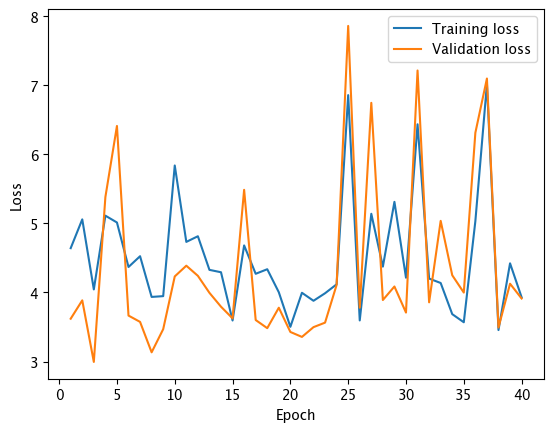

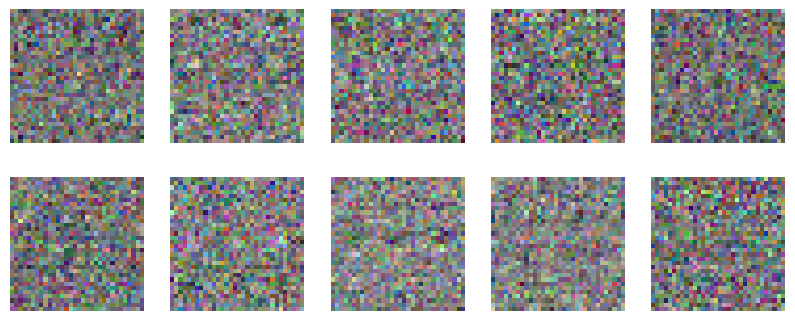

Test accuracy: 29.34%

Training with parameters: {'lambda_': 0, 'n_epochs': 40, 'n_batch': 100, 'eta': 0.001}
Epoch 1/40, training cost: 1.9781933405447774
Epoch 2/40, training cost: 1.8939163563394883
Epoch 3/40, training cost: 1.8495285567819424
Epoch 4/40, training cost: 1.8201247856802751
Epoch 5/40, training cost: 1.798316917746116
Epoch 6/40, training cost: 1.781056818909575
Epoch 7/40, training cost: 1.766809782967309
Epoch 8/40, training cost: 1.7546951190187243
Epoch 9/40, training cost: 1.7441610493659867
Epoch 10/40, training cost: 1.7348399773154444
Epoch 11/40, training cost: 1.7264757052371915
Epoch 12/40, training cost: 1.7188833562698076
Epoch 13/40, training cost: 1.7119257407098056
Epoch 14/40, training cost: 1.7054986644777363
Epoch 15/40, training cost: 1.69952140800528
Epoch 16/40, training cost: 1.693930345028872
Epoch 17/40, training cost: 1.688674545690129
Epoch 18/40, training cost: 1.6837126755276346
Epoch 19/40, training cost: 1.6790107643630297
Epoch 20/40, 

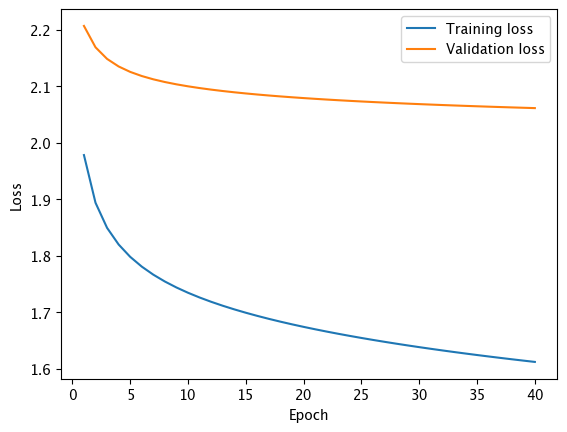

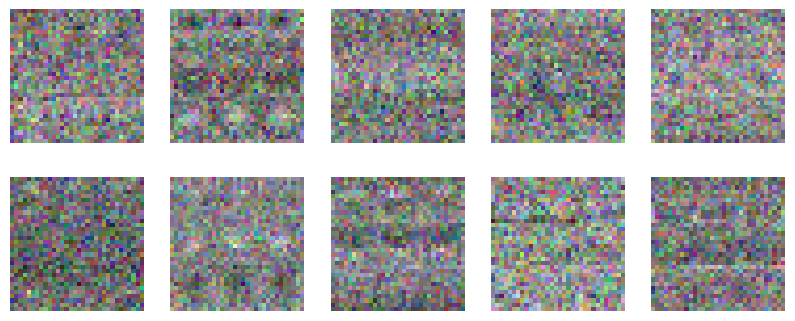

Test accuracy: 39.07%

Training with parameters: {'lambda_': 0.1, 'n_epochs': 40, 'n_batch': 100, 'eta': 0.001}
Epoch 1/40, training cost: 2.27640940845242
Epoch 2/40, training cost: 2.1803407269424073
Epoch 3/40, training cost: 2.126495225537235
Epoch 4/40, training cost: 2.088449384774093
Epoch 5/40, training cost: 2.058554253397684
Epoch 6/40, training cost: 2.03367090358614
Epoch 7/40, training cost: 2.0122214866833414
Epoch 8/40, training cost: 1.9932989858178458
Epoch 9/40, training cost: 1.9763315296333528
Epoch 10/40, training cost: 1.9609338060017376
Epoch 11/40, training cost: 1.946832958768091
Epoch 12/40, training cost: 1.9338281198655298
Epoch 13/40, training cost: 1.9217666978517987
Epoch 14/40, training cost: 1.9105296931249116
Epoch 15/40, training cost: 1.9000221933960224
Epoch 16/40, training cost: 1.8901669994535149
Epoch 17/40, training cost: 1.8809002240878328
Epoch 18/40, training cost: 1.872168178699277
Epoch 19/40, training cost: 1.8639251247041089
Epoch 20/40, 

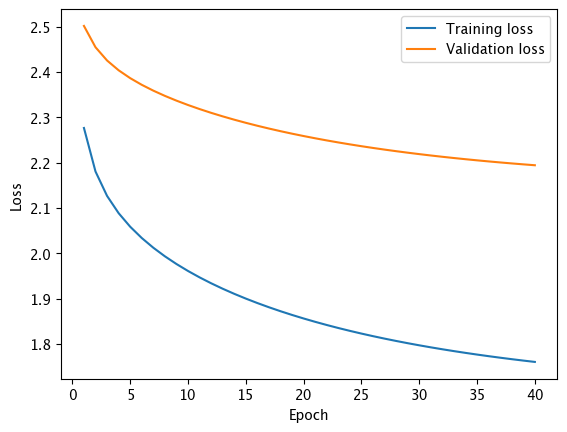

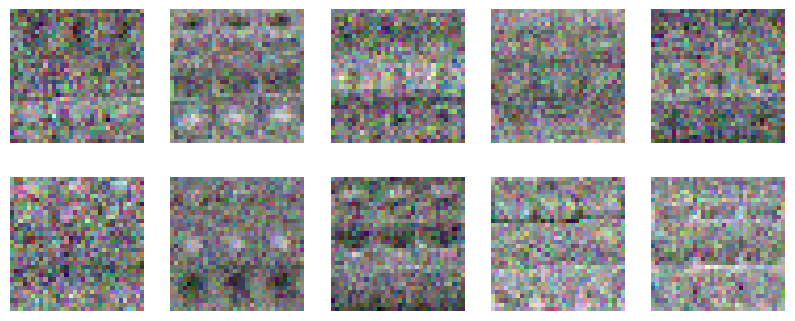

Test accuracy: 39.16%

Training with parameters: {'lambda_': 1, 'n_epochs': 40, 'n_batch': 100, 'eta': 0.001}
Epoch 1/40, training cost: 4.035065449937337
Epoch 2/40, training cost: 3.303310268120425
Epoch 3/40, training cost: 2.830828459184768
Epoch 4/40, training cost: 2.5196256761917804
Epoch 5/40, training cost: 2.313302088369271
Epoch 6/40, training cost: 2.1760966305891665
Epoch 7/40, training cost: 2.0846968288164467
Epoch 8/40, training cost: 2.0237400498560154
Epoch 9/40, training cost: 1.983050088462584
Epoch 10/40, training cost: 1.9558669901974333
Epoch 11/40, training cost: 1.9376923406248183
Epoch 12/40, training cost: 1.925529219756296
Epoch 13/40, training cost: 1.9173794251975707
Epoch 14/40, training cost: 1.911909873088757
Epoch 15/40, training cost: 1.9082308165819375
Epoch 16/40, training cost: 1.9057482050779968
Epoch 17/40, training cost: 1.904065305881004
Epoch 18/40, training cost: 1.9029171054340206
Epoch 19/40, training cost: 1.9021265449386808
Epoch 20/40, t

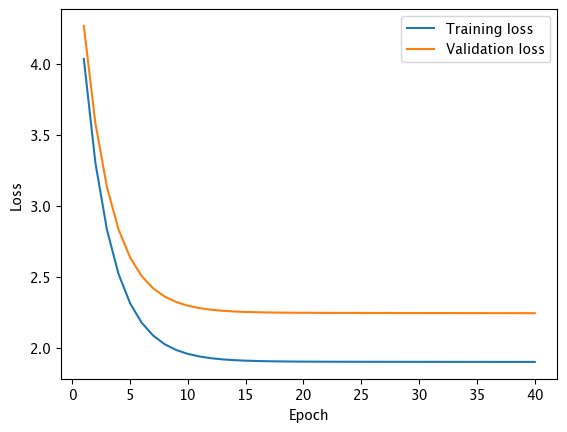

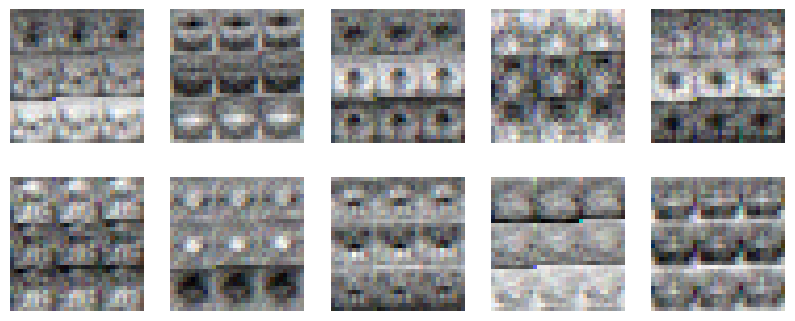

Test accuracy: 37.61%



In [ ]:
parameter_settings = [
    {"lambda_": 0,"n_epochs": 40,  "n_batch": 100, "eta": 0.1},
    {"lambda_": 0,"n_epochs": 40,  "n_batch": 100, "eta": 0.001},
    {"lambda_": 0.1,"n_epochs": 40, "n_batch": 100, "eta": 0.001},
    {"lambda_": 1,"n_epochs": 40, "n_batch": 100, "eta": 0.001},
]
for params in parameter_settings:
    print(f"Training with parameters: {params}")
    W, b = initialize_parameters(K, d)
    GDparams = (params["n_batch"], params["eta"], params["n_epochs"])


    W_star, b_star, train_losses, val_losses = MiniBatchGD(trainX_norm, train_Y, GDparams, W, b, lambda_=params["lambda_"])
    plot_loss(train_losses, val_losses)

    plot_weights(W_star)
    
    test_accuracy = ComputeAccuracy(testX_norm, test_y, W_star, b_star)
    print(f"Test accuracy: {test_accuracy * 100:.2f}%\n")